In [ ]:
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv("placement.csv")
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [ ]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

Perceptron()

In [ ]:
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(accuracy)

0.75


In [ ]:
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      0.50      0.67        10

    accuracy                           0.75        20
   macro avg       0.83      0.75      0.73        20
weighted avg       0.83      0.75      0.73        20



In [ ]:
perceptron.intercept_

array([-47.])

In [ ]:
perceptron.coef_

array([[ 44.42, -41.1 ]])

### Perceptron Trick

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)


In [2]:
import matplotlib.pyplot as plt

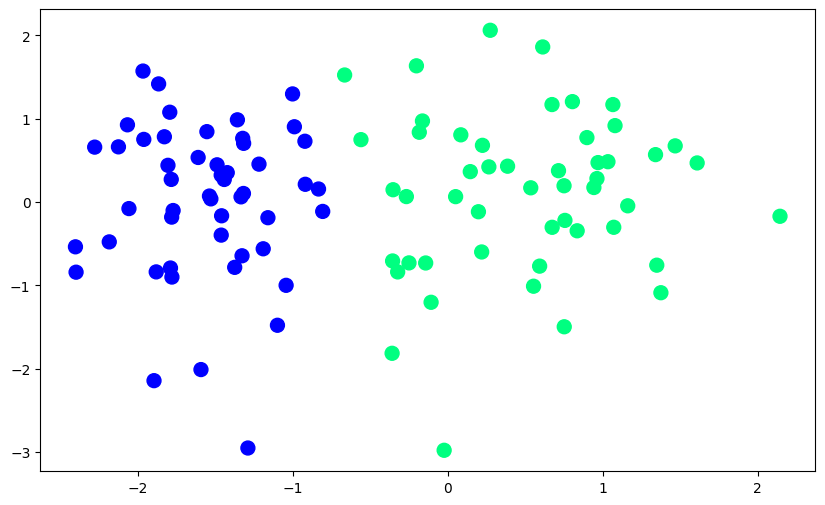

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [7]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [4]:
def step(z):
    return 1 if z>0 else 0

In [8]:
intercept_,coef_ = perceptron(X,y)


In [9]:
print(coef_)
print(intercept_)

[1.35203378 0.08150911]
1.0


In [10]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [11]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

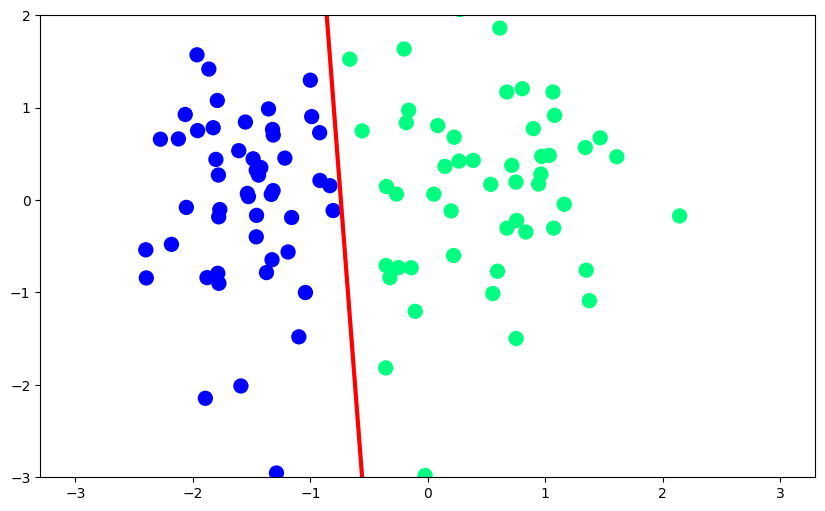

In [12]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)